In [1]:
%matplotlib inline
import math
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from matplotlib.transforms import Affine2D
from wpimath.geometry import Pose2d, Translation2d, Rotation2d, Transform2d

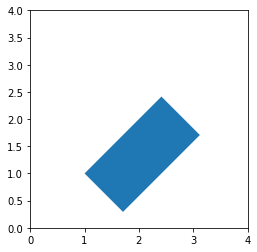

In [2]:
fig, ax = plt.subplots()

xy = (1, 1)
width = 1
height = 2
angle = -45

rect = patches.Rectangle(xy, width, height, angle)

ax.add_patch(rect)
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_aspect("equal", "box")

plt.show()

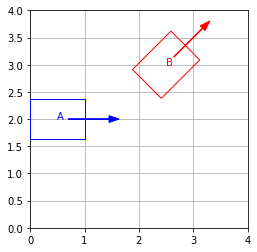

In [7]:
def plot_pose(ax, pose,label='A', color='b'):
    width = 1
    height = 0.75
    x, y = pose.X(), pose.Y()
    rotation = pose.rotation() # .rotateBy(Rotation2d(math.pi/2))
    
    td = ax.transData
    transform = Affine2D().rotate_around(x, y, rotation.radians())

    arrow_width = 0.005
    ax.text(x, y, label, color=color, zorder=100)
    ax.arrow(x+0.2, y, 0.75, 0, width=arrow_width, head_width=25*arrow_width,  edgecolor=color, facecolor=color, zorder=100, transform=transform + td)
    frame_rect = patches.Rectangle((x-width/2, y-height/2), width, height, linewidth=1, edgecolor=color, facecolor='none', zorder=100, transform=transform + td)

    ax.add_patch(frame_rect)
    return ax


fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0,wspace=0)
ax.set_aspect("equal", "box")
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.grid(zorder=0)
pose = Pose2d(Translation2d(0.5, 2), Rotation2d.fromDegrees(0))
ax = plot_pose(ax, pose, 'A')
pose = pose.transformBy(Transform2d(Translation2d(2, 1), Rotation2d.fromDegrees(45)))
ax = plot_pose(ax, pose, 'B', 'r')
fig.savefig("pose.svg")
plt.show()

In [4]:
plt.close()